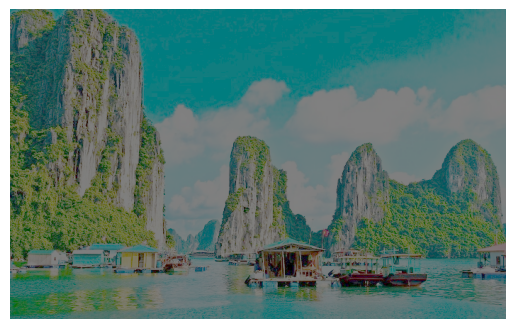

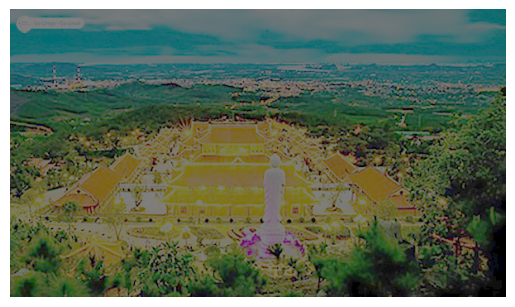

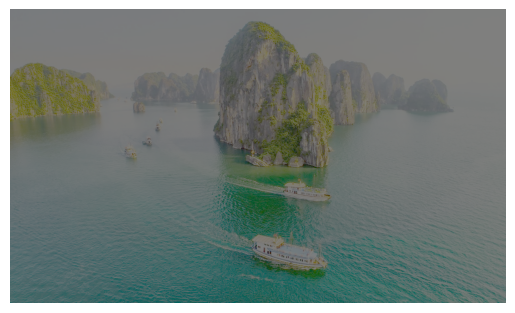

In [11]:
#BT1
from PIL import Image
import math
import numpy as np
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt

def inverse_tranformation(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    im_2 = 255 - im_1
    new_img = Image.fromarray(im_2)
    iio.imsave('./' + filename + '_inverse.png', new_img)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    plt.show()

def gamma_correction(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    gamma = 0.5
    b1 = im_1.astype(float) 
    b2 = np.max(b1)
    b3 = b1 / b2
    epsilon = 1e-10
    b2 = np.log(b3 + epsilon) * gamma
    c = np.exp(b2) * 255.0
    c1 = np.clip(c, 0, 255).astype(np.uint8)
    d = Image.fromarray(c1)
    iio.imsave('./' + filename + '_gamma.png', d)
    plt.imshow(d, cmap='gray') 
    plt.axis('off')
    plt.show()

def log_transformation(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    iio.imsave('./' + filename + '_log.png', d)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    
def histogram_equalization(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    iio.imsave('./' + filename + '_histogram.png', d)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    
def contrast_stretching(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    iio.imsave('./' + filename + '_contrast.png', d)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    
user_input = input("Nhan phim I, G, L, H, C de chay chuong trinh: ")
img1 = "./exercise/ha-long-bay-in-vietnam.jpg"
img2 = "./exercise/pagoda.jpg"
img3 = "./exercise/quang_ninh.jpg"
if user_input == "I":
    inverse_tranformation(img1)
    inverse_tranformation(img2)
    inverse_tranformation(img3)
elif user_input == "G":
    gamma_correction(img1)
    gamma_correction(img2)
    gamma_correction(img3)
elif user_input == "L":
    log_transformation(img1)
    log_transformation(img2)
    log_transformation(img3)
elif user_input == "H":
    histogram_equalization(img1)
    histogram_equalization(img2)
    histogram_equalization(img3)
elif user_input == "C":
    contrast_stretching(img1)
    contrast_stretching(img2)
    contrast_stretching(img3)
else:
    print("Khong co chuong trinh nay")

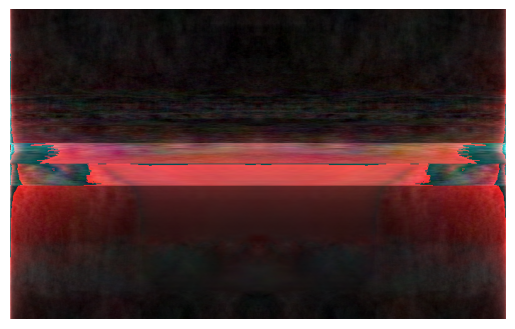

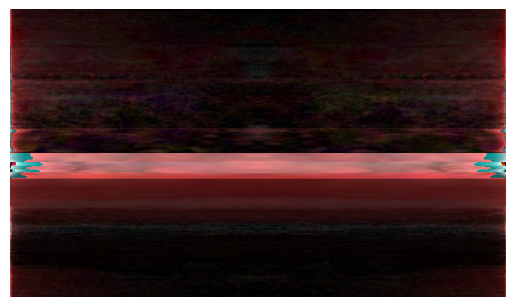

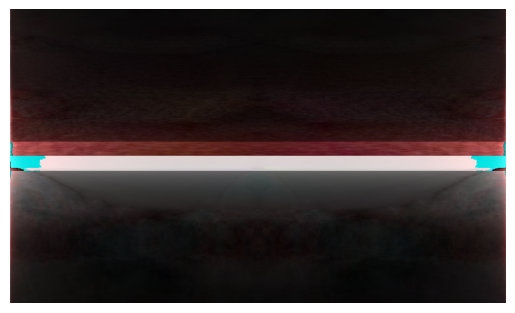

In [ ]:
#BT2
from PIL import Image
import math
import numpy as np
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.fftpack

def fast_fourier(img_name):
    img = Image.open(img_name).convert('L')
    filename = img_name.split('/')[-1].split('.')[0]
    im_1 = np.asarray(img)
    c = abs(scipy.fftpack.fft2(im_1))
    d = scipy.fftpack.ifft2(c)
    d = d.astype(np.uint8)
    im3 = Image.fromarray(d)
    iio.imsave('./' + filename + '_fft.png', im3)
    plt.imshow(im3)
    plt.axis('off')
    plt.show()

def butterworth_lowpass_filter(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    iml = np.asarray(img)
    c = abs(scipy.fftpack.fft2(iml)) 
    d = scipy.fftpack.fftshift(c) 
    M = d.shape[0] 
    N = d.shape[1] 
    H = np.ones((M, N)) 
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0
    t1 = 1
    t2 = 2 * t1
    
    for i in range(1, M): 
        for j in range(1, N): 
            rl = (i - center1) ** 2 + (j - center2) ** 2 
            r = math.sqrt(rl) 
            if r > d_0:
                H[i, j] = 1 / (1 + (r / d_0) ** t1) 

    H = H.astype(float)
    
    # Mở rộng H để có kích thước (M, N, 1) để phù hợp với hình ảnh màu
    H = H[:, :, np.newaxis]  # Thêm chiều mới

    con = d * H  # Bây giờ H có kích thước (M, N, 1) và d có kích thước (M, N, 3)
    e = abs(scipy.fftpack.ifft2(con)) 
    e = e.astype(float) 

    # Chuyển đổi e về kiểu uint8 và đảm bảo giá trị nằm trong khoảng 0-255
    e = np.clip(e, 0, 255)  # Giới hạn giá trị trong khoảng 0-255
    e = e.astype(np.uint8)  # Chuyển đổi kiểu dữ liệu

    im3 = Image.fromarray(e)
    iio.imsave('./' + filename + '_BLPF.png', im3)
    plt.imshow(im3) 
    plt.show()

def butterworth_highpass_filter(img_name):
    img = Image.open(img_name)
    filename = img_name.split('/')[-1].split('.')[0]
    iml = np.asarray(img) 
    c = abs(scipy.fftpack.fft2(iml)) 
    d = scipy.fftpack.fftshift(c) 
    M, N, channels = iml.shape  # Get the number of channels
    H = np.ones((M, N)) 
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0  # Cut-off radius 
    t1 = 1  # The order of BLPF (Butterworth Lowpass Filter) 

    # Defining the convolution function for BLPF 
    for i in range(M): 
        for j in range(N): 
            rl = (i - center1) ** 2 + (j - center2) ** 2 
            r = math.sqrt(rl) 
            if r > d_0:
                H[i, j] = 1 / (1 + (r / d_0) ** t1) 

    # H is converted from ndarray to image 
    H = H.astype(float)

    # Expand H to match the number of channels
    H = np.stack([H] * channels, axis=-1)

    # Performing the convolution
    con = d * H 

    # Computing the magnitude of the inverse FFT
    e = abs(scipy.fftpack.ifft2(con)) 

    # e is converted from ndarray to image 
    e = e.astype(float)
    im3 = Image.fromarray(np.uint8(e))

    # Save the image
    iio.imsave('./' + filename + '_BHPF.png', im3)
    plt.imshow(im3) 
    plt.axis('off')
    plt.show()
    
user_input2 = input("Nhap F, L, H de chay chuong trinh: ")
img1 = "./exercise/ha-long-bay-in-vietnam.jpg"
img2 = "./exercise/pagoda.jpg"
img3 = "./exercise/quang_ninh.jpg"
if user_input2 == "F":
    fast_fourier(img1)
    fast_fourier(img2)
    fast_fourier(img3)
elif user_input2 == "L":
    butterworth_lowpass_filter(img1)
    butterworth_lowpass_filter(img2)
    butterworth_lowpass_filter(img3)
elif user_input2 == "H":
    butterworth_highpass_filter(img1)
    butterworth_highpass_filter(img2)
    butterworth_highpass_filter(img3)
else:
    print("Khong co chuong trinh nay")

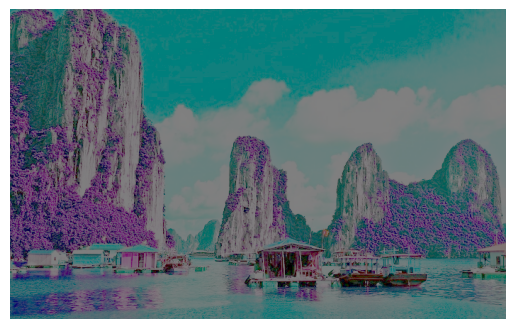

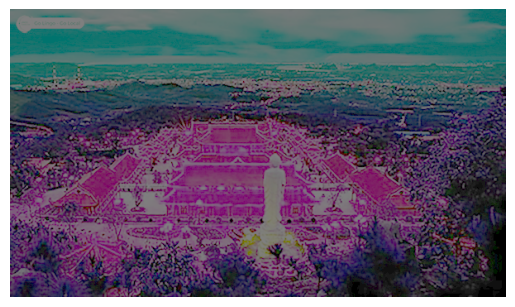

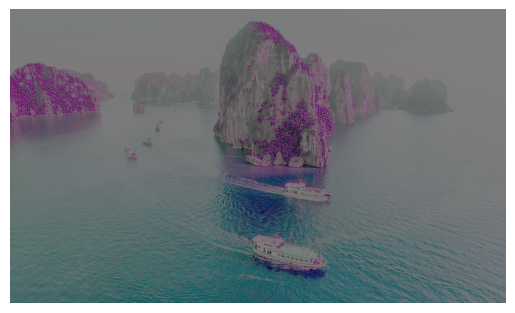

In [55]:
#BT3
from PIL import Image
import math
import numpy as np
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as sn
from skimage import filters, feature
import random

img_name1 = "./exercise/ha-long-bay-in-vietnam.jpg"
img_name2 = "./exercise/pagoda.jpg"
img_name3 = "./exercise/quang_ninh.jpg"

img1 = Image.open(img_name1)
img2 = Image.open(img_name2)
img3 = Image.open(img_name3)

img1_array = np.array(img1)
img2_array = np.array(img2)
img3_array = np.array(img3)

# Random color
channel_permutation = random.sample([0, 1, 2], 3)
random_rgb1 = img1_array[:, :, channel_permutation]
random_rgb2 = img2_array[:, :, channel_permutation]
random_rgb3 = img3_array[:, :, channel_permutation]

def inverse_tranformation(img):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
def gamma_correction(img):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
def log_transformation(img):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
def histogram_equalization(img):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
def contrast_stretching(img):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()

img_change = random.randrange(1, 6)
if img_change == 1:
    inverse_tranformation(random_rgb1)
    inverse_tranformation(random_rgb2)
    inverse_tranformation(random_rgb3)
elif img_change == 2:
    gamma_correction(random_rgb1)
    gamma_correction(random_rgb2)
    gamma_correction(random_rgb3)
elif img_change == 3:
    log_transformation(random_rgb1)
    log_transformation(random_rgb2)
    log_transformation(random_rgb3)
elif img_change == 4:
    histogram_equalization(random_rgb1)
    histogram_equalization(random_rgb2)
    histogram_equalization(random_rgb3)
elif img_change == 5:
    contrast_stretching(random_rgb1)
    contrast_stretching(random_rgb2)
    contrast_stretching(random_rgb3)
    

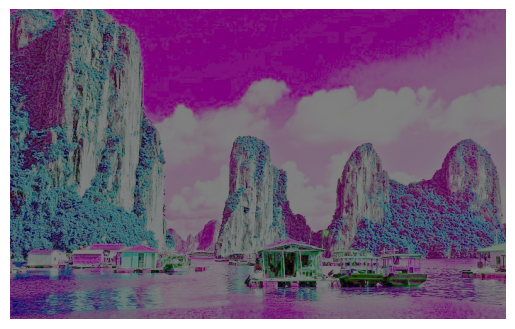

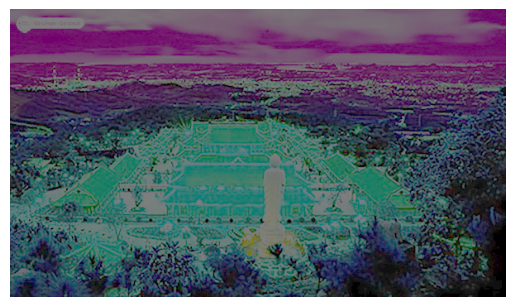

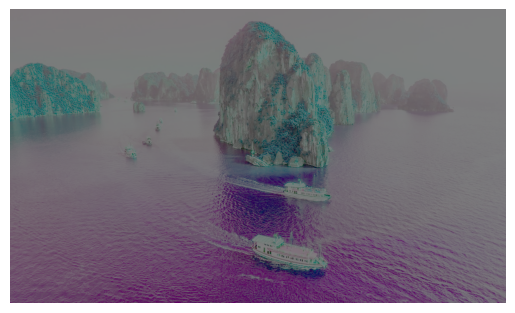

In [115]:
#BT3
from PIL import Image
import math
import numpy as np
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as sn
import random

img_name1 = "./exercise/ha-long-bay-in-vietnam.jpg"
img_name2 = "./exercise/pagoda.jpg"
img_name3 = "./exercise/quang_ninh.jpg"

img1 = Image.open(img_name1)
img2 = Image.open(img_name2)
img3 = Image.open(img_name3)

img1_array = np.array(img1)
img2_array = np.array(img2)
img3_array = np.array(img3)

# Random color
channel_permutation = random.sample([0, 1, 2], 3)
random_rgb1 = img1_array[:, :, channel_permutation]
random_rgb2 = img2_array[:, :, channel_permutation]
random_rgb3 = img3_array[:, :, channel_permutation]

def inverse_transformation(img, img_index):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'inverse_transformation_image_{img_index}.png', c1)

def gamma_correction(img, img_index):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'gamma_correction_image_{img_index}.png', c1)

def log_transformation(img, img_index):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'log_transformation_image_{img_index}.png', c1)

def histogram_equalization(img, img_index):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'histogram_equalization_image_{img_index}.png', c1)

def contrast_stretching(img, img_index):
    im_1 = np.asarray(img)
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    c1 = c.astype(np.uint8)
    d = Image.fromarray(c1)
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'contrast_stretching_image_{img_index}.png', c1)

# Chọn ngẫu nhiên hình ảnh để xử lý
img_change = random.randrange(1, 6)
if img_change == 1:
    inverse_transformation(random_rgb1, 1)
    inverse_transformation(random_rgb2, 2)
    inverse_transformation(random_rgb3, 3)
elif img_change == 2:
    gamma_correction(random_rgb1, 1)
    gamma_correction(random_rgb2, 2)
    gamma_correction(random_rgb3, 3)
elif img_change == 3:
    log_transformation(random_rgb1, 1)
    log_transformation(random_rgb2, 2)
    log_transformation(random_rgb3, 3)
elif img_change == 4:
    histogram_equalization(random_rgb1, 1)
    histogram_equalization(random_rgb2, 2)
    histogram_equalization(random_rgb3, 3)
elif img_change == 5:
    contrast_stretching(random_rgb1, 1)
    contrast_stretching(random_rgb2, 2)
    contrast_stretching(random_rgb3, 3)


C:\Users\ACER\AppData\Local\Temp\ipykernel_10984\1524629474.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  d = d.astype(np.uint8)


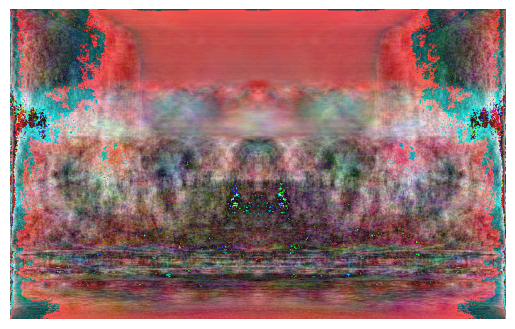

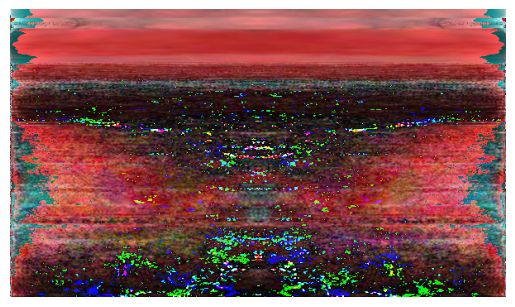

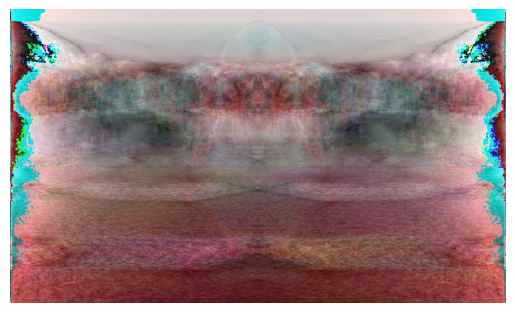

In [ ]:
#BT4
from PIL import Image
import math
import numpy as np
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as sn
import random

img_name1 = "./exercise/ha-long-bay-in-vietnam.jpg"
img_name2 = "./exercise/pagoda.jpg"
img_name3 = "./exercise/quang_ninh.jpg"

img1 = Image.open(img_name1)
img2 = Image.open(img_name2)
img3 = Image.open(img_name3)

img1_array = np.array(img1)
img2_array = np.array(img2)
img3_array = np.array(img3)

# Random color
channel_permutation = random.sample([0, 1, 2], 3)
random_rgb1 = img1_array[:, :, channel_permutation]
random_rgb2 = img2_array[:, :, channel_permutation]
random_rgb3 = img3_array[:, :, channel_permutation]

def fast_fourier(img, img_index):
    im_1 = np.asarray(img)
    c = abs(scipy.fftpack.fft2(im_1))
    d = scipy.fftpack.ifft2(c)
    d = d.astype(np.uint8)
    im3 = Image.fromarray(d)
    plt.imshow(im3, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'./random_rgb/fast_fourier_image_{img_index}.png', d)

def butterworth_lowpass_filter(img, img_index):
    iml = np.asarray(img)
    c = abs(scipy.fftpack.fft2(iml)) 
    d = scipy.fftpack.fftshift(c) 
    M = d.shape[0] 
    N = d.shape[1] 
    H = np.ones((M, N)) 
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0
    t1 = 1
    
    for i in range(1, M): 
        for j in range(1, N): 
            rl = (i - center1) ** 2 + (j - center2) ** 2 
            r = math.sqrt(rl) 
            if r > d_0:
                H[i, j] = 1 / (1 + (r / d_0) ** t1)
            else:
                H[i, j] = 0

    H = H.astype(float)
    H = H[:, :, np.newaxis]  # Expand H for color images
    con = d * H  
    e = abs(scipy.fftpack.ifft2(con)) 
    e = e.astype(float) 
    im3 = Image.fromarray(np.uint8(e))
    image_min_filter = sn.minimum_filter(im3, size=3)
    plt.imshow(image_min_filter, cmap='gray')
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'./random_rgb/butterworth_lowpass_image_{img_index}.png', image_min_filter)

def butterworth_highpass_filter(img, img_index):
    iml = np.asarray(img) 
    c = abs(scipy.fftpack.fft2(iml)) 
    d = scipy.fftpack.fftshift(c) 
    M, N, channels = iml.shape  
    H = np.ones((M, N)) 
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0  
    t1 = 1  

    for i in range(M): 
        for j in range(N): 
            rl = (i - center1) ** 2 + (j - center2) ** 2 
            r = math.sqrt(rl) 
            if r > d_0:
                H[i, j] = 1 / (1 + (r / d_0) ** t1) 

    H = H.astype(float)
    H = np.stack([H] * channels, axis=-1)
    con = d * H 
    e = abs(scipy.fftpack.ifft2(con)) 
    e = e.astype(float)
    im3 = Image.fromarray(np.uint8(e))
    image_max_filter = sn.maximum_filter(im3, size=3)
    plt.imshow(image_max_filter, cmap='gray') 
    plt.axis('off')
    plt.show()
    # Save the image
    iio.imsave(f'./random_rgb/butterworth_highpass_image_{img_index}.png', image_max_filter)

# Chọn ngẫu nhiên hình ảnh để xử lý
img_change = random.randrange(1, 4)

# Xử lý hình ảnh dựa trên lựa chọn ngẫu nhiên
if img_change == 1:
    fast_fourier(random_rgb1, 1)
    fast_fourier(random_rgb2, 2)
    fast_fourier(random_rgb3, 3)
elif img_change == 2:
    butterworth_lowpass_filter(random_rgb1, 1)
    butterworth_lowpass_filter(random_rgb2, 2)
    butterworth_lowpass_filter(random_rgb3, 3)
elif img_change == 3:
    butterworth_highpass_filter(random_rgb1, 1)
    butterworth_highpass_filter(random_rgb2, 2)
    butterworth_highpass_filter(random_rgb3, 3)


In [42]:
import random
for i in range(10):
    print(random.randrange(1, 4))

3
2
2
3
3
1
3
1
2
1
